<a href="https://colab.research.google.com/github/VrajPatel18011/202418011/blob/daiict/Project_Feature_Finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Scraping

Dataset Source: Kaggle - Car Datasets

Instructions:

* Download the Datasets: Access the link below to view downloaded multiple car datasets from Kaggle profiles or notebooks.
* Combine into a Single DataFrame: Merge this downloaded datasets into a single unified DataFrame for comprehensive analysis.
* Folder Link: https://drive.google.com/drive/folders/1doeXd3GBMgcOps-7c6T9TySfpeEhdMnN?usp=drive_link
* Dataset Link: https://docs.google.com/spreadsheets/d/1JZMKihKLC6d2rYUxqCC1TcSwbD43ok9m/edit?usp=sharing&ouid=117077230225619083409&rtpof=true&sd=true

# Data Preprocessing





In [4]:
# @title Data Cleaning and fill null values
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Project/car_dataset.xlsx')

df.columns

# This method is used for apply on none
# x = df['Car Make'].mode()[0]

df['Car Make'] = df['Car Make'].str.replace('None', 'BMW', regex=False)
df['Car Model'] = df['Car Model'].str.replace('None','Prius', regex=False)
df['Maintenance History'] = df['Maintenance History'].str.replace('None','Engine oil change', regex=False)
df['Coverage Type'] = df['Coverage Type'].str.replace('None','Third-party', regex=False)
df['Location'] = df['Location'].str.replace('None','India', regex=False)
df['Vehicle Condition'] = df['Vehicle Condition'].str.replace('None','Excellent', regex=False)

# For converting Repair cost column from Object Datatype to Integer
'''
    df['Repair Costs'] = df['Repair Costs'].str.replace('$','',regex=False)
    df['Repair Costs'] = df['Repair Costs'].str.replace(',','',regex=False)
    df['Repair Costs'] = df['Repair Costs'].astype(int)
'''

# For rechecking the None or Null values
'''
    df.value_counts('None')
    for i in df.select_dtypes(include = object).columns:
        df[i] = df[i].str.lower()
    for i in df.columns:
        print(df[i].unique())
'''

# For applying necessary changes directly to the file
'''
# df.to_excel('/content/drive/MyDrive/Project/car_dataset.xlsx', index=False)
'''
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Car Make             10000 non-null  object
 1   Car Model            10000 non-null  object
 2   Year of Manufacture  10000 non-null  int64 
 3   Engine Size          10000 non-null  int64 
 4   Mileage              10000 non-null  int64 
 5   Maintenance History  10000 non-null  object
 6   Maintenance Cost     10000 non-null  int64 
 7   Repair Costs         10000 non-null  int64 
 8   Insurance Premium    10000 non-null  int64 
 9   Coverage Type        10000 non-null  object
 10  Location             10000 non-null  object
 11  Driver Age           10000 non-null  int64 
 12  Driver Experience    10000 non-null  int64 
 13  Safety Feature       10000 non-null  object
 14  Vehicle Condition    10000 non-null  object
dtypes: int64(8), object(7)
memory usage: 1.1+ MB


# Dataset overview

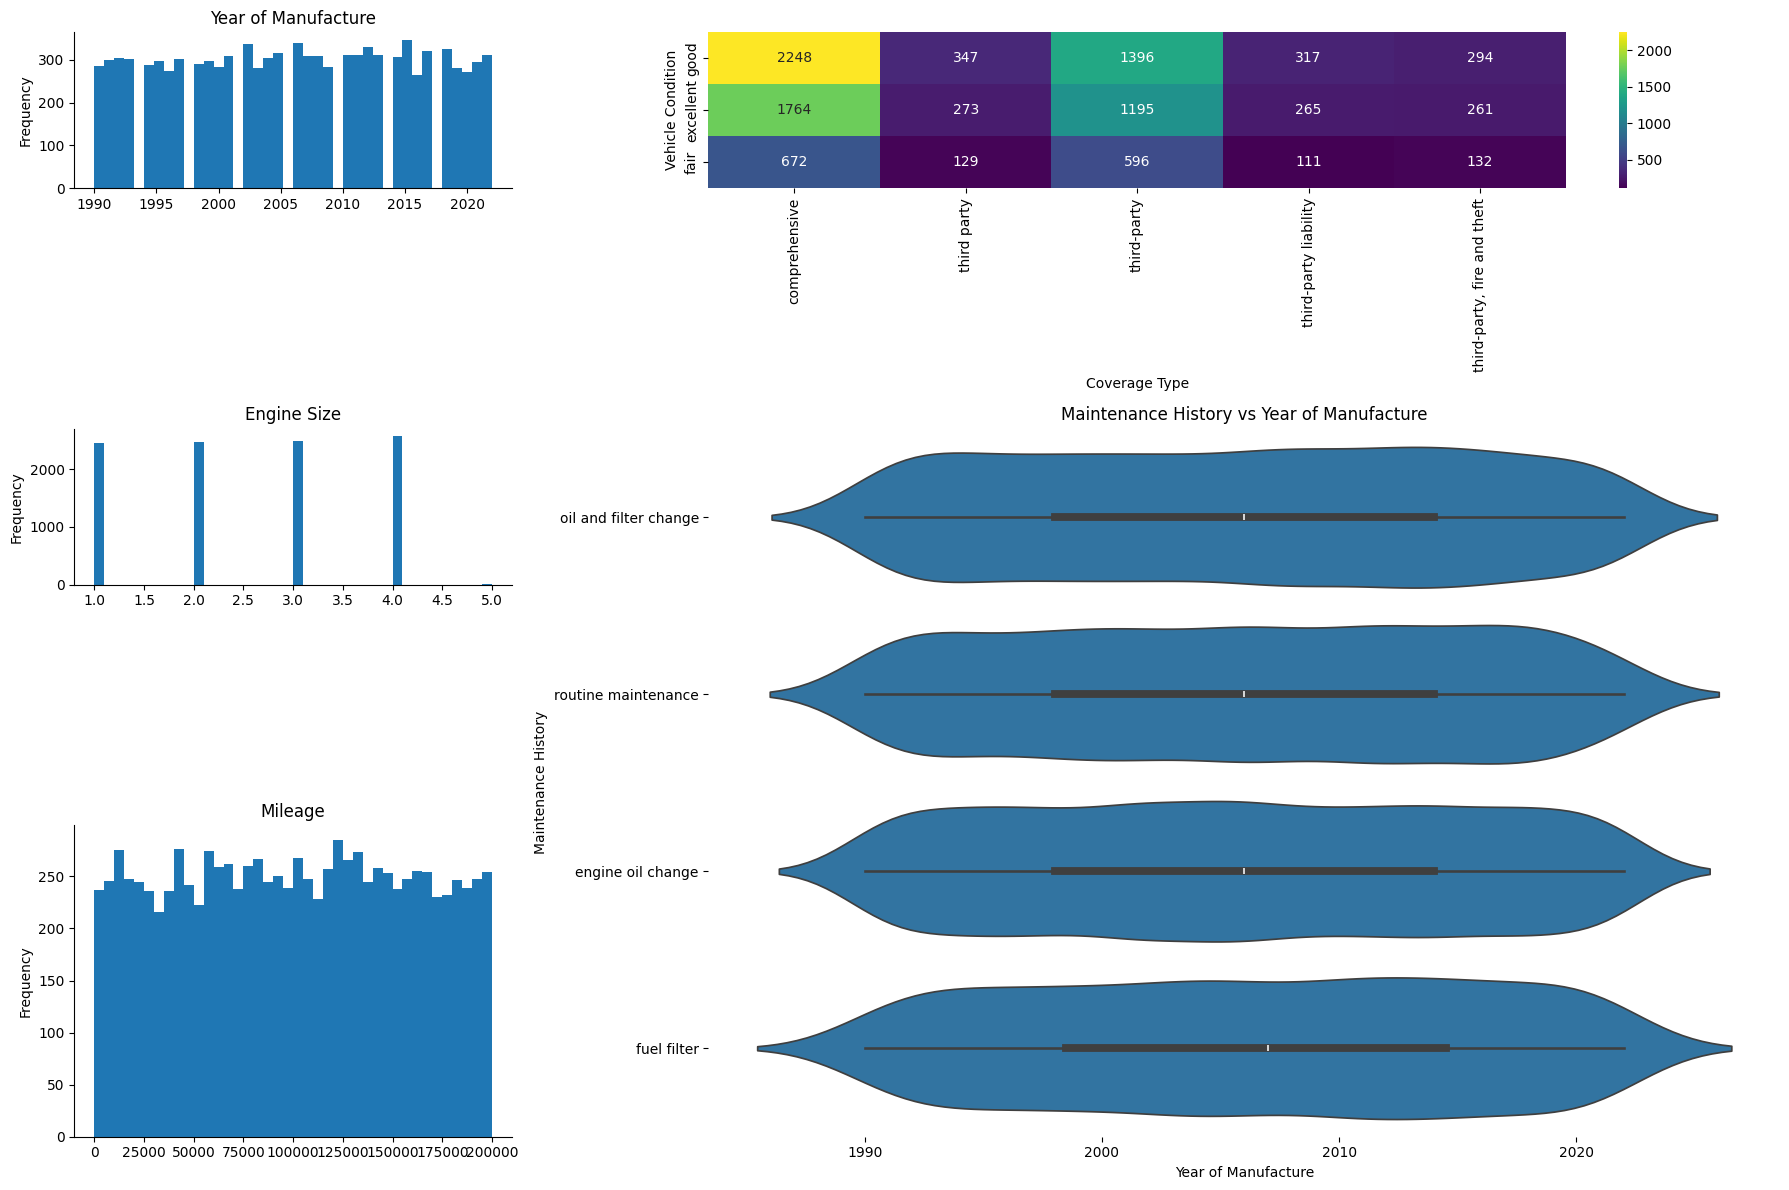

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Load dataset
df = pd.read_excel("/content/drive/MyDrive/Project/car_dataset.xlsx")

# Set up the figure with GridSpec
fig = plt.figure(figsize=(18, 12))
gs = GridSpec(nrows=3, ncols=3, width_ratios=[1, 1, 1], height_ratios=[1, 1, 2])

# Plot histograms for 'Year of Manufacture', 'Engine Size', and 'Mileage'
for i, column in enumerate(['Year of Manufacture', 'Engine Size', 'Mileage']):
    ax = fig.add_subplot(gs[i, 0])
    df[column].plot(kind='hist', bins=40, ax=ax, title=column)
    ax.spines[['top', 'right']].set_visible(False)

# Heatmap for 'Coverage Type' vs 'Vehicle Condition'
ax_heatmap = fig.add_subplot(gs[0, 1:])
df_2dhist = pd.DataFrame({
    x_label: grp['Vehicle Condition'].value_counts()
    for x_label, grp in df.groupby('Coverage Type')
})
sns.heatmap(df_2dhist, cmap='viridis', ax=ax_heatmap, annot=True, fmt='d')
ax_heatmap.set_xlabel('Coverage Type')
ax_heatmap.set_ylabel('Vehicle Condition')

# Violin plot for 'Maintenance History' vs 'Year of Manufacture'
ax_violin = fig.add_subplot(gs[1:, 1:])
figsize = (12, 1.2 * len(df['Maintenance History'].unique()))
sns.violinplot(data=df, x='Year of Manufacture', y='Maintenance History', inner='box', ax=ax_violin)
sns.despine(top=True, right=True, bottom=True, left=True, ax=ax_violin)
ax_violin.set_title('Maintenance History vs Year of Manufacture')

# Adjust layout
plt.tight_layout()
plt.show()


# For Calculation of specific Car and for that model  

In [10]:
# Taking total prediction cost for all models that will display all models prediction in end
total_pred = {}
total_car = {}

# Models for Regressions


*   Linear Regression
*   Ridge Regression
*   Lasso Regression
*   Elastic Net



###Linear Regression

Validation Set Performance:

Cross-Validated MSE: 0.014427424193273064
Mean squared error:  0.012237277429299887
Coefficient of determination:  0.9875364541535705
Mean absolute error:  0.08845364231902485
Root Mean Squared error :  0.11062222845929243
Explained Variance Score:  0.9875365908103598

Test Set Performance:

Cross-Validated MSE: 0.014201040425938335
Mean squared error:  0.012166138960456038
Coefficient of determination:  0.9870921754630989
Mean absolute error:  0.08914406546655484
Root Mean Squared error :  0.11030022194200716
Explained Variance Score:  0.9871307628154502
----------------------------------------------------------------------------------------------------
Maintenance Cost for honda:  10967
Maintenance Cost for mercedes-benz:  10933
Maintenance Cost for audi:  10993
Maintenance Cost for tesla:  10919
Maintenance Cost for toyota:  10912
Maintenance Cost for nissan:  10926
Maintenance Cost for hyundai:  10960
Maintenance Cost for lexus:  10947
Maintenance Cost 

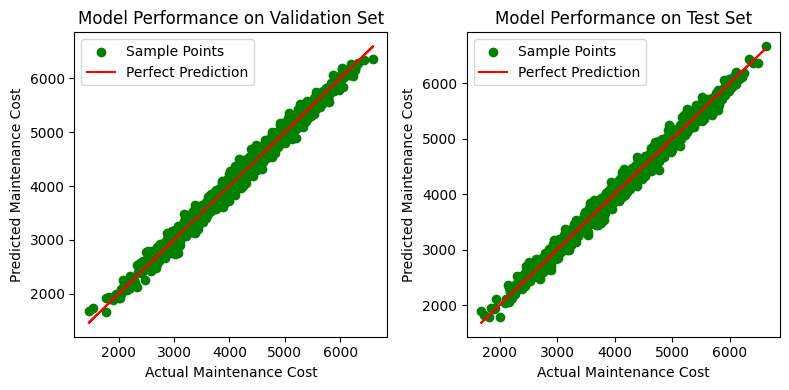

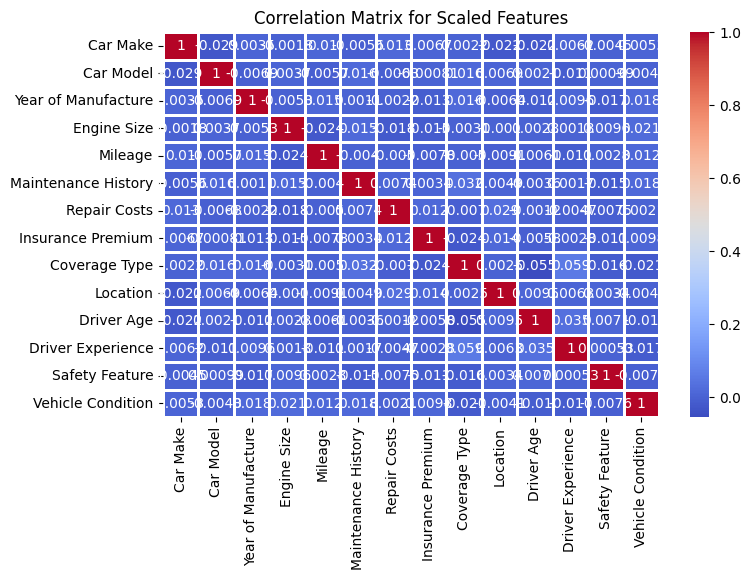

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel("/content/drive/MyDrive/Project/car_dataset.xlsx")

# Define features and target variable
X = df.drop("Maintenance Cost", axis=1)
y = df['Maintenance Cost']

# Convert categorical features using LabelEncoder
cat = X.select_dtypes(include='object').columns
le = {}
for col in cat:
    le[col] = LabelEncoder()
    X[col] = le[col].fit_transform(X[col])

# Apply scaling to features and target variable
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Create the pipeline with polynomial features, and model
pipeline = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=1100, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1100, shuffle=True)

# Grid Search for Hyperparameter Tuning
param_grid = {
    'model': [LinearRegression()]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Train the model
grid_search.fit(X_train, y_train)
model = grid_search.best_params_

# Make predictions on the validation and test sets
y_pred_val = grid_search.predict(X_val)
y_pred_test = grid_search.predict(X_test)
cv_scores_val = cross_val_score(grid_search, X_val, y_val, cv=5, scoring='neg_mean_squared_error')
cv_scores_test = cross_val_score(grid_search, X_test, y_test, cv=5, scoring='neg_mean_squared_error')

# Evaluate on validation set
print('Validation Set Performance:')
print()
print(f'Cross-Validated MSE: {-cv_scores_val.mean()}')
print('Mean squared error: ', mean_squared_error(y_val, y_pred_val))
print('Coefficient of determination: ', r2_score(y_val, y_pred_val))
print('Mean absolute error: ', mean_absolute_error(y_val, y_pred_val))
print('Root Mean Squared error : ', np.sqrt(mean_squared_error(y_val, y_pred_val)))
print('Explained Variance Score: ', explained_variance_score(y_val, y_pred_val))

print()
# Evaluate on test set
print('Test Set Performance:')
print()
print(f'Cross-Validated MSE: {-cv_scores_test.mean()}')
print('Mean squared error: ', mean_squared_error(y_test, y_pred_test))
print('Coefficient of determination: ', r2_score(y_test, y_pred_test))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared error : ', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('Explained Variance Score: ', explained_variance_score(y_test, y_pred_test))

print("-"*100)

def car_make(car):

    # Prediction for a new car
    predx = pd.DataFrame({
        'Car Make': [car],
        'Car Model': ['accord'],
        'Year of Manufacture': [2014],
        'Engine Size': [2],
        'Mileage': [10000],
        'Maintenance History': ['fuel filter'],
        'Repair Costs': [15000],
        'Insurance Premium': [10000],
        'Coverage Type': ['third-party'],
        'Location': ['india'],
        'Driver Age': [64],
        'Driver Experience': [10],
        'Safety Feature': ['tire pressure monitoring system'],
        'Vehicle Condition': ['good']
    })

    # Convert categorical features using LabelEncoder
    for col in predx.select_dtypes(include='object').columns:
        predx[col] = le[col].transform(predx[col])

    # Apply scaling to features
    predx_scaled = scaler_X.transform(predx)

    # Predict maintenance cost
    predicted_cost = scaler_y.inverse_transform(grid_search.best_estimator_.predict(predx_scaled))
    print(f"Maintenance Cost for {car}: ", int(predicted_cost[0].item()))
    total_car[car] = int(predicted_cost[0].item())

car = df['Car Make'].unique()
for i in car:
  car_make(i)

total_pred['Linear Regression'] = total_car
print("-"*100)

# Create two graphs in one row.
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Plot actual vs. predicted for test set
ax2.scatter(scaler_y.inverse_transform(y_test), scaler_y.inverse_transform(y_pred_test), color='green', label='Sample Points')
ax2.plot(scaler_y.inverse_transform(y_test), scaler_y.inverse_transform(y_test), color='red', label='Perfect Prediction')
ax2.set_xlabel('Actual Maintenance Cost')
ax2.set_ylabel('Predicted Maintenance Cost')
ax2.set_title('Model Performance on Test Set')
ax2.legend()

# Plot actual vs. predicted for val set
ax1.scatter(scaler_y.inverse_transform(y_val), scaler_y.inverse_transform(y_pred_val), color='green', label='Sample Points')
ax1.plot(scaler_y.inverse_transform(y_val), scaler_y.inverse_transform(y_val), color='red', label='Perfect Prediction')
ax1.set_xlabel('Actual Maintenance Cost')
ax1.set_ylabel('Predicted Maintenance Cost')
ax1.set_title('Model Performance on Validation Set')
ax1.legend()

plt.tight_layout()
plt.show()

# Heat map for correlation matrix
corr_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation Matrix for Scaled Features')
plt.show()

### Ridge Regression


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Ridge(alpha=0.5)
Validation Set Performance:

Cross-Validated MSE: 0.011884686328742854
Mean squared error:  0.011685306158234056
Coefficient of determination:  0.988720275271802
Mean absolute error:  0.08753792660653113
Root Mean Squared error :  0.10809859461729396
Validation Set Performance:

Cross-Validated MSE: 0.011595940450979008
Mean squared error:  0.011422857395524332
Coefficient of determination:  0.9886170295453401
Mean absolute error:  0.08621843673014636
Root Mean Squared error :  0.10687776848121565
----------------------------------------------------------------------------------------------------
Maintenance Cost for honda:  10850
Maintenance Cost for mercedes-benz:  10849
Maintenance Cost for audi:  10851
Maintenance Cost for tesla:  10849
Maintenance Cost for toyota:  10849
Maintenance Cost for nissan:  10849
Maintenance Cost for hyundai:  10850
Maintenance Cost for lexus:  10850
Maintenance Cost for bmw:  1

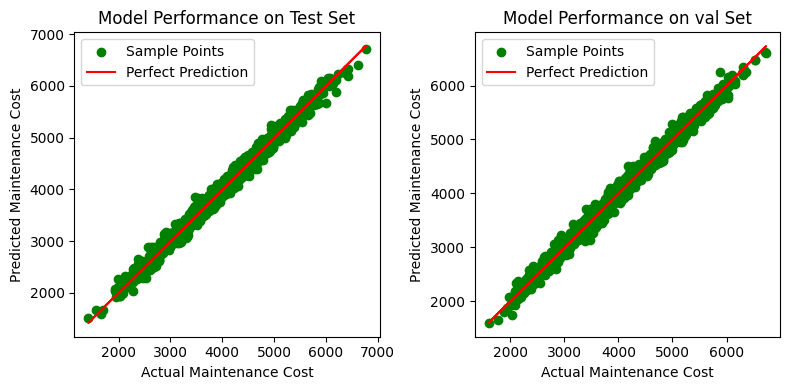

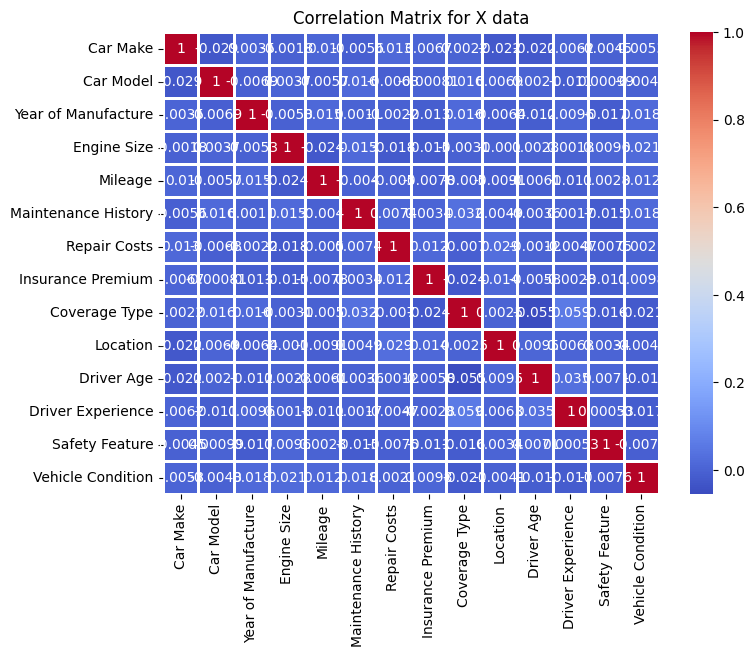

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel("/content/drive/MyDrive/Project/car_dataset.xlsx")

# Define features and target variable
X = df.drop("Maintenance Cost", axis=1)
y = df['Maintenance Cost']

# Convert categorical features using LabelEncoder
cols = X.select_dtypes(include='object').columns
le = {}
for col in cols:
  le[col] = LabelEncoder()
  X[col] = le[col].fit_transform(X[col])

# Apply scaling to features and target variable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=104, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=104, shuffle=True)

# Create the pipeline with polynomial features, and Ridge model
pipeline = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', Ridge())
])

# Define the parameter grid for Ridge Regression
param_grid = {
    'alpha': [0.1,0.5,1,5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Train the model on the training set with the best parameters
pipeline = grid_search.best_estimator_
print(grid_search.best_estimator_)

# Make predictions on the validation and test sets
y_pred_val = pipeline.predict(X_val)
y_pred_test = pipeline.predict(X_test)
cv_scores_val = cross_val_score(pipeline, X_val, y_val, cv=5, scoring='neg_mean_squared_error')
cv_scores_test = cross_val_score(pipeline, X_test, y_test, cv=5, scoring='neg_mean_squared_error')

# Evaluate on validation set
print('Validation Set Performance:')
print()
print(f'Cross-Validated MSE: {-cv_scores_val.mean()}')
print('Mean squared error: ', mean_squared_error(y_val, y_pred_val))
print('Coefficient of determination: ', r2_score(y_val, y_pred_val))
print('Mean absolute error: ', mean_absolute_error(y_val, y_pred_val))
print('Root Mean Squared error : ', np.sqrt(mean_squared_error(y_val, y_pred_val)))

# Evaluate on test set
print('Validation Set Performance:')
print()
print(f'Cross-Validated MSE: {-cv_scores_test.mean()}')
print('Mean squared error: ', mean_squared_error(y_test, y_pred_test))
print('Coefficient of determination: ', r2_score(y_test, y_pred_test))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared error : ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

print("-"*100)

def car_make(car):

    # Prediction for a new car
    predx = pd.DataFrame({
        'Car Make': [car],
        'Car Model': ['accord'],
        'Year of Manufacture': [2014],
        'Engine Size': [2],
        'Mileage': [10000],
        'Maintenance History': ['fuel filter'],
        'Repair Costs': [15000],
        'Insurance Premium': [10000],
        'Coverage Type': ['third-party'],
        'Location': ['india'],
        'Driver Age': [64],
        'Driver Experience': [10],
        'Safety Feature': ['tire pressure monitoring system'],
        'Vehicle Condition': ['good']
    })

    # Convert categorical features using LabelEncoder
    for col in predx.select_dtypes(include='object').columns:
        predx[col] = le[col].transform(predx[col])

    # Apply scaling to features
    predx_scaled = scaler_X.transform(predx)

    # Predict maintenance cost
    predicted_cost = scaler_y.inverse_transform(grid_search.best_estimator_.predict(predx_scaled))
    print(f"Maintenance Cost for {car}: ", int(predicted_cost[0].item()))
    total_car[car] = int(predicted_cost[0].item())

car = df['Car Make'].unique()
for i in car:
  car_make(i)

total_pred['Ridge'] = total_car

print("-"*100)

# Create two graphs in one row.
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Plot actual vs. predicted for test set
ax1.scatter(scaler_y.inverse_transform(y_test), scaler_y.inverse_transform(y_pred_test), color='green', label='Sample Points')
ax1.plot(scaler_y.inverse_transform(y_test), scaler_y.inverse_transform(y_test), color='red', label='Perfect Prediction')
ax1.set_xlabel('Actual Maintenance Cost')
ax1.set_ylabel('Predicted Maintenance Cost')
ax1.set_title('Model Performance on Test Set')
ax1.legend()

# Plot actual vs. predicted for val set
ax2.scatter(scaler_y.inverse_transform(y_val), scaler_y.inverse_transform(y_pred_val), color='green', label='Sample Points')
ax2.plot(scaler_y.inverse_transform(y_val), scaler_y.inverse_transform(y_val), color='red', label='Perfect Prediction')
ax2.set_xlabel('Actual Maintenance Cost')
ax2.set_ylabel('Predicted Maintenance Cost')
ax2.set_title('Model Performance on val Set')
ax2.legend()

plt.tight_layout()
plt.show()

# Heat map for correlation matrix
corr_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation Matrix for X data')
plt.show()

### Lasso Regression

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Lasso(alpha=0.0005)
Validation Set Performance:

Cross-Validated MSE: 0.011833410765647529
Mean squared error:  0.01164529702352129
Coefficient of determination:  0.988758895742679
Mean absolute error:  0.08739441747488487
Root Mean Squared error :  0.10791337740762862
Test Set Performance:

Cross-Validated MSE: 0.01156977076484141
Mean squared error:  0.01143167348833936
Coefficient of determination:  0.9886082442370269
Mean absolute error:  0.08627087897524244
Root Mean Squared error :  0.1069190043366443
----------------------------------------------------------------------------------------------------
Maintenance Cost for honda:  10843
Maintenance Cost for mercedes-benz:  10842
Maintenance Cost for audi:  10843
Maintenance Cost for tesla:  10842
Maintenance Cost for toyota:  10842
Maintenance Cost for nissan:  10842
Maintenance Cost for hyundai:  10843
Maintenance Cost for lexus:  10842
Maintenance Cost for bmw:  10843
Ma

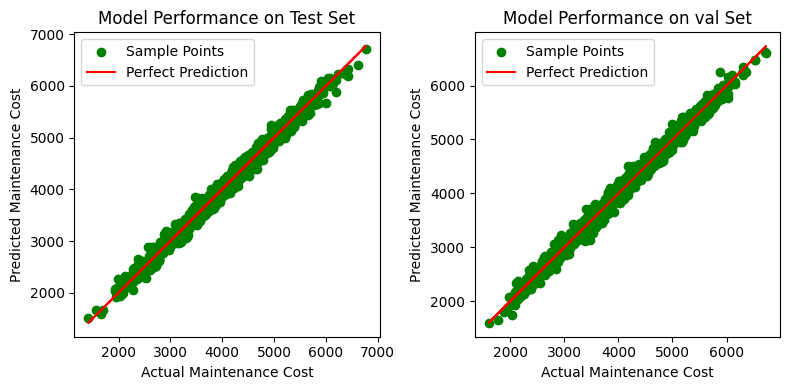

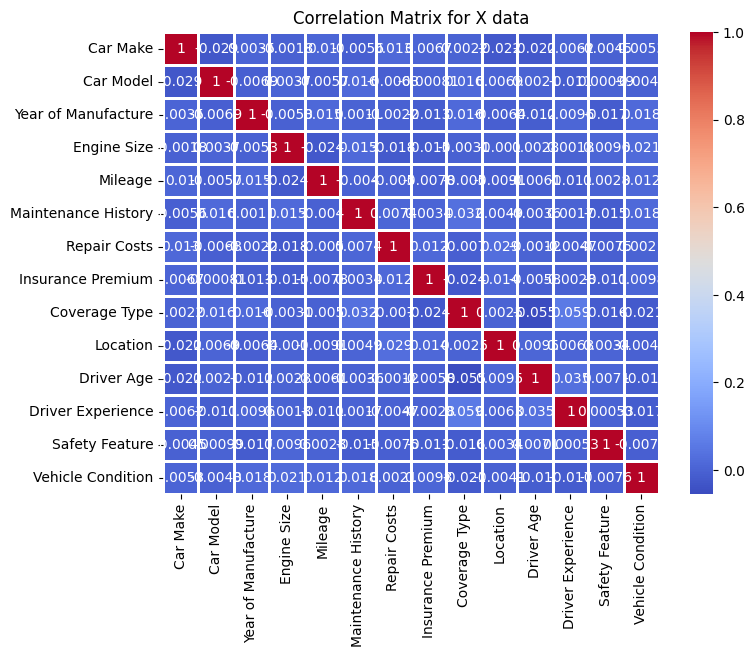

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import PolynomialFeatures , StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Load dataset
df = pd.read_excel("/content/drive/MyDrive/Project/car_dataset.xlsx")
X = df.drop('Maintenance Cost',axis=1)
y = df['Maintenance Cost']

# Convert categorical features using LabelEncoder
cols = X.select_dtypes(include='object').columns
le = {}
for col in cols:
  le[col] = LabelEncoder()
  X[col] = le[col].fit_transform(X[col])

# Choose and apply scaling to features (optional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=104, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=104, shuffle=True)

# Create the pipeline with polynomial features, and Ridge model
pipeline = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', Lasso())
])

# Define the parameter grid for Ridge Regression
param_grid = {
    'alpha': [0.0001,0.0005,0.001,0.005]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=Lasso(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Train the model on the training set with the best parameters
pipeline = grid_search.best_estimator_
print(grid_search.best_estimator_)

# Make predictions on the validation and test sets
y_pred_val = pipeline.predict(X_val)
y_pred_test = pipeline.predict(X_test)
cross_val_score_val = cross_val_score(pipeline, X_val, y_val, cv=5, scoring='neg_mean_squared_error')
cross_val_score_test = cross_val_score(pipeline, X_test, y_test, cv=5, scoring='neg_mean_squared_error')

# Evaluate on validation set
print('Validation Set Performance:')
print()
print(f'Cross-Validated MSE: {-cross_val_score_val.mean()}')
print('Mean squared error: ', mean_squared_error(y_val, y_pred_val))
print('Coefficient of determination: ', r2_score(y_val, y_pred_val))
print('Mean absolute error: ', mean_absolute_error(y_val, y_pred_val))
print('Root Mean Squared error : ', np.sqrt(mean_squared_error(y_val, y_pred_val)))

# Evaluate on test set
print('Test Set Performance:')
print()
print(f'Cross-Validated MSE: {-cross_val_score_test.mean()}')
print('Mean squared error: ', mean_squared_error(y_test, y_pred_test))
print('Coefficient of determination: ', r2_score(y_test, y_pred_test))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared error : ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

print("-"*100)

def car_make(car):

    # Prediction for a new car
    predx = pd.DataFrame({
        'Car Make': [car],
        'Car Model': ['accord'],
        'Year of Manufacture': [2014],
        'Engine Size': [2],
        'Mileage': [10000],
        'Maintenance History': ['fuel filter'],
        'Repair Costs': [15000],
        'Insurance Premium': [10000],
        'Coverage Type': ['third-party'],
        'Location': ['india'],
        'Driver Age': [64],
        'Driver Experience': [10],
        'Safety Feature': ['tire pressure monitoring system'],
        'Vehicle Condition': ['good']
    })

    # Convert categorical features using LabelEncoder
    for col in predx.select_dtypes(include='object').columns:
        predx[col] = le[col].transform(predx[col])

    # Apply scaling to features
    predx_scaled = scaler_X.transform(predx)

    # Predict maintenance cost
    predicted_cost = scaler_y.inverse_transform(grid_search.best_estimator_.predict(predx_scaled).reshape(-1,1))
    print(f"Maintenance Cost for {car}: ", int(predicted_cost[0].item()))
    total_car[car] = int(predicted_cost[0].item())

car = df['Car Make'].unique()
for i in car:
  car_make(i)

total_pred['Lasso'] = total_car

print("-"*100)
# Create two graphs in one row.
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Plot actual vs. predicted for test set
ax1.scatter(scaler_y.inverse_transform(y_test.reshape(1,-1)), scaler_y.inverse_transform(y_pred_test.reshape(1,-1)), color='green', label='Sample Points')
ax1.plot(scaler_y.inverse_transform(y_test), scaler_y.inverse_transform(y_test), color='red', label='Perfect Prediction')
ax1.set_xlabel('Actual Maintenance Cost')
ax1.set_ylabel('Predicted Maintenance Cost')
ax1.set_title('Model Performance on Test Set')
ax1.legend()

# Plot actual vs. predicted for val set
ax2.scatter(scaler_y.inverse_transform(y_val.reshape(1,-1)), scaler_y.inverse_transform(y_pred_val.reshape(1,-1)), color='green', label='Sample Points')
ax2.plot(scaler_y.inverse_transform(y_val), scaler_y.inverse_transform(y_val), color='red', label='Perfect Prediction')
ax2.set_xlabel('Actual Maintenance Cost')
ax2.set_ylabel('Predicted Maintenance Cost')
ax2.set_title('Model Performance on val Set')
ax2.legend()

plt.tight_layout()
plt.show()

# Heat map for correlation matrix
corr_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation Matrix for X data')
plt.show()


# Elastic Net

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('model', ElasticNet(alpha=0.001))])

Validation Set Performance:

Cross-Validated MSE: 0.012884001673921114
Mean squared error:  0.011767880925165859
Coefficient of determination:  0.9886405665651687
Mean absolute error:  0.08805438418275055
Root Mean Squared error :  0.108479864146144
Test Set Performance:

Cross-Validated MSE: 0.013461980747140825
Mean squared error:  0.01149479382065678
Coefficient of determination:  0.9885453443116422
Mean absolute error:  0.08655934108371068
Root Mean Squared error :  0.10721377626339247
----------------------------------------------------------------------------------------------------
Maintenance Cost for honda:  10905
Maintenance Cost for mercedes-benz:  10894
Maintenance Cost for audi:  10913
Maintenance Cost for tesla:  10889
Maintenance Cost for toyota:  10887
Maintenance Cost for nissan:  10892
Main

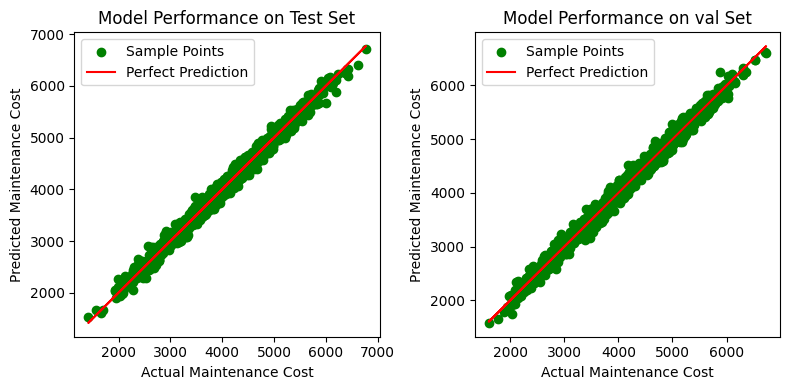

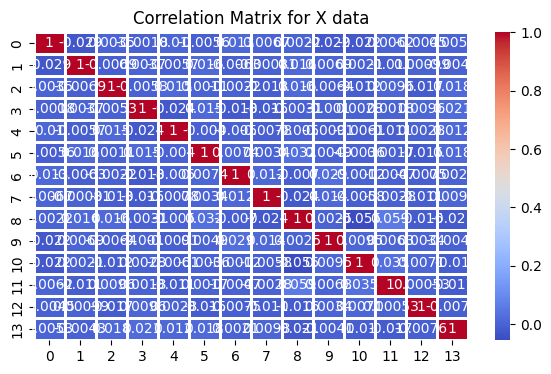

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel("/content/drive/MyDrive/Project/car_dataset.xlsx")

# Define features and target variable
X = df.drop("Maintenance Cost", axis=1)
y = df['Maintenance Cost']

# Convert categorical features using LabelEncoder
cols = X.select_dtypes(include='object').columns
le = {}
for col in cols:
    le[col] = LabelEncoder()
    X[col] = le[col].fit_transform(X[col])

# Apply scaling to features and target variable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=104, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=104, shuffle=True)

# Create the pipeline with polynomial features and ElasticNet model
pipeline = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', ElasticNet())
])

# Define the parameter grid for ElasticNet
param_grid = {
    'model__alpha': [0.001,0.05,0.007,0.01],
    'model__l1_ratio': [0.01,0.05,0.1,0.5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Train the model on the training set with the best parameters
pipeline = grid_search.best_estimator_
print(grid_search.best_estimator_)

# Make predictions on the validation and test sets
y_pred_val = pipeline.predict(X_val)
y_pred_test = pipeline.predict(X_test)
cv_scores_val = cross_val_score(pipeline, X_val, y_val, cv=5, scoring='neg_mean_squared_error')
cv_scores_test = cross_val_score(pipeline, X_test, y_test, cv=5, scoring='neg_mean_squared_error')

print()
# Evaluate on validation set
print('Validation Set Performance:')
print()
print(f'Cross-Validated MSE: {-cv_scores_val.mean()}')
print('Mean squared error: ', mean_squared_error(y_val, y_pred_val))
print('Coefficient of determination: ', r2_score(y_val, y_pred_val))
print('Mean absolute error: ', mean_absolute_error(y_val, y_pred_val))
print('Root Mean Squared error : ', np.sqrt(mean_squared_error(y_val, y_pred_val)))

# Evaluate on test set
print('Test Set Performance:')
print()
print(f'Cross-Validated MSE: {-cv_scores_test.mean()}')
print('Mean squared error: ', mean_squared_error(y_test, y_pred_test))
print('Coefficient of determination: ', r2_score(y_test, y_pred_test))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared error : ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

print("-"*100)

def car_make(car):

    # Prediction for a new car
    predx = pd.DataFrame({
        'Car Make': [car],
        'Car Model': ['accord'],
        'Year of Manufacture': [2014],
        'Engine Size': [2],
        'Mileage': [10000],
        'Maintenance History': ['fuel filter'],
        'Repair Costs': [15000],
        'Insurance Premium': [10000],
        'Coverage Type': ['third-party'],
        'Location': ['india'],
        'Driver Age': [64],
        'Driver Experience': [10],
        'Safety Feature': ['tire pressure monitoring system'],
        'Vehicle Condition': ['good']
    })

    # Convert categorical features using LabelEncoder
    for col in predx.select_dtypes(include='object').columns:
        predx[col] = le[col].transform(predx[col])

    # Apply scaling to features
    predx_scaled = scaler_X.transform(predx)

    # Predict maintenance cost
    predicted_cost = scaler_y.inverse_transform(grid_search.best_estimator_.predict(predx_scaled).reshape(-1,1))
    print(f"Maintenance Cost for {car}: ", int(predicted_cost[0].item()))
    total_car[car] = int(predicted_cost[0].item())

car = df['Car Make'].unique()
for i in car:
  car_make(i)

total_pred['Elastic net'] = total_car

print("-"*100)
# Create two graphs in one row.
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Plot actual vs. predicted for test set
ax1.scatter(scaler_y.inverse_transform(y_test.reshape(1,-1)), scaler_y.inverse_transform(y_pred_test.reshape(1,-1)), color='green', label='Sample Points')
ax1.plot(scaler_y.inverse_transform(y_test), scaler_y.inverse_transform(y_test), color='red', label='Perfect Prediction')
ax1.set_xlabel('Actual Maintenance Cost')
ax1.set_ylabel('Predicted Maintenance Cost')
ax1.set_title('Model Performance on Test Set')
ax1.legend()

# Plot actual vs. predicted for validation set
ax2.scatter(scaler_y.inverse_transform(y_val.reshape(1,-1)), scaler_y.inverse_transform(y_pred_val.reshape(1,-1)), color='green', label='Sample Points')
ax2.plot(scaler_y.inverse_transform(y_val), scaler_y.inverse_transform(y_val), color='red', label='Perfect Prediction')
ax2.set_xlabel('Actual Maintenance Cost')
ax2.set_ylabel('Predicted Maintenance Cost')
ax2.set_title('Model Performance on val Set')
ax2.legend()

plt.tight_layout()
plt.show()

# Heat map for correlation matrix
corr_matrix = pd.DataFrame(X_scaled).corr()
plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation Matrix for X data')
plt.show()


# Pie Chart for maintenance cost for all models

In [32]:
import plotly.graph_objects as go

# Flattening the hierarchical data for sunburst
labels = []
parents = []
values = []

for model, cars in total_pred.items():
    labels.append(model)
    parents.append('')
    values.append(sum(cars.values()))
    for car, cost in cars.items():
        labels.append(car)
        parents.append(model)
        values.append(cost)

# Create Sunburst Chart
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
))

fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))
fig.show()

# Below is the link to our practice Colab notebook.
* Link :- https://colab.research.google.com/drive/1i5L4PyANNlif6DLD6Wt5EgQzdGwe491Q?usp=sharing